In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from datetime import datetime
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('Transaction data.csv')
data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [4]:
data.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


## PRE-PROCESSING

#### Check Mising Value

In [5]:
data.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

#### Cleaning data

In [6]:
data.dropna(inplace = True)
data.isnull().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

### Check the distribution of countries

In [7]:
data.value_counts('Country').head(10)

Country
United Kingdom    485040
Germany            10675
France             10526
EIRE                8048
Belgium             2539
Spain               2430
Switzerland         2336
Netherlands         2330
Portugal            1848
Australia           1704
dtype: int64

## Data Filter for Germany

In [8]:
germany_data = data[data['Country'] == 'Germany']
germany_data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
914,581494,12/9/2019,23084,Rabbit Night Light,6.19,24,12518.0,Germany
915,581494,12/9/2019,21559,Strawberry Lunch Box With Cutlery,6.19,6,12518.0,Germany
916,581494,12/9/2019,21506,Fancy Font Birthday Card,6.19,12,12518.0,Germany
917,581494,12/9/2019,22716,Card Circus Parade,6.19,12,12518.0,Germany
918,581494,12/9/2019,22556,Plasters In Tin Circus Parade,6.19,12,12518.0,Germany


## Market Basket Analysis (MBA)

### Formatting Data for Market Basket Analysis 

In [9]:
basket = germany_data.groupby(['TransactionNo', 'ProductName'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('TransactionNo')

def encode_units(x):
    if x <= 0:
        return 0
    else:
        return 1

basket = basket.applymap(encode_units)

basket.head()


ProductName,10 Colour Spaceboy Pen,12 Coloured Party Balloons,12 Ivory Rose Peg Place Settings,12 Message Cards With Envelopes,12 Pencil Small Tube Woodland,12 Pencils Small Tube Red Retrospot,12 Pencils Small Tube Skull,12 Pencils Tall Tube Posy,12 Pencils Tall Tube Red Retrospot,12 Pencils Tall Tube Skulls,...,You're Confusing Me Metal Sign,Yuletide Images Gift Wrap Set,Zinc Box Sign Home,Zinc Folkart Sleigh Bells,Zinc Heart Lattice Charger Large,Zinc Heart Lattice T-Light Holder,Zinc Metal Heart Decoration,Zinc T-Light Holder Star Large,Zinc T-Light Holder Stars Small,Zinc Willie Winkie Candle Stick
TransactionNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Market Basket Analysis with Apriori

In [10]:
# minimum support 0.01
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

frequent_itemsets.head()

,support,itemsets
0,0.020443,(10 Colour Spaceboy Pen)
1,0.017036,(12 Pencil Small Tube Woodland)
2,0.011925,(12 Pencils Small Tube Red Retrospot)
3,0.015332,(12 Pencils Tall Tube Woodland)
4,0.010221,(20 Dolly Pegs Retrospot)


### Computing Association Rules

In [11]:
# minimum confidence 0.2
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(10 Colour Spaceboy Pen),(Spaceboy Lunch Box),0.020443,0.080068,0.010221,0.500000,6.244681,0.008585,1.839864,0.857391
1,(12 Pencils Tall Tube Woodland),(Round Snack Boxes Set Of4 Woodland),0.015332,0.185690,0.010221,0.666667,3.590214,0.007374,2.442930,0.732699
2,(3 Hook Hanger Magic Garden),(6 Ribbons Rustic Charm),0.028961,0.086882,0.010221,0.352941,4.062284,0.007705,1.411182,0.776316
3,(3 Hook Hanger Magic Garden),(Round Snack Boxes Set Of 4 Fruits),0.028961,0.119250,0.011925,0.411765,3.452941,0.008471,1.497274,0.731579
4,(3 Hook Hanger Magic Garden),(Round Snack Boxes Set Of4 Woodland),0.028961,0.185690,0.011925,0.411765,2.217485,0.006547,1.384327,0.565414


In [12]:
rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5179,"(Round Snack Boxes Set Of 4 Fruits, Scandinavi...","(Round Snack Boxes Set Of4 Woodland, Chocolate...",0.010221,0.011925,0.010221,1.0,83.857143,0.010100,inf,0.998279
5791,"(Storage Tin Vintage Doily, Set Of 4 Knick Kna...",(Storage Tin Vintage Leaf),0.010221,0.011925,0.010221,1.0,83.857143,0.010100,inf,0.998279
5799,"(Set Of 4 Knick Knack Tins Doily, Storage Tin ...","(Storage Tin Vintage Doily, Round Storage Tin ...",0.010221,0.011925,0.010221,1.0,83.857143,0.010100,inf,0.998279
5800,"(Storage Tin Vintage Doily, Storage Tin Vintag...","(Set Of 4 Knick Knack Tins Doily, Round Storag...",0.010221,0.011925,0.010221,1.0,83.857143,0.010100,inf,0.998279
1480,(Ribbon Reel Christmas Present),(Ribbon Reel Christmas Sock Bauble),0.010221,0.013629,0.010221,1.0,73.375000,0.010082,inf,0.996558
3544,"(Pack Of 20 Skull Paper Napkins, Set/6 Red Spo...",(Pack Of 6 Skull Paper Plates),0.010221,0.013629,0.010221,1.0,73.375000,0.010082,inf,0.996558
5067,"(Blue Vintage Spot Beaker, Green Vintage Spot ...","(Pink Vintage Spot Beaker, Red Vintage Spot Be...",0.011925,0.013629,0.011925,1.0,73.375000,0.011763,inf,0.998276
576,(Pink Regency Teacup And Saucer),(Green Regency Teacup And Saucer),0.010221,0.015332,0.010221,1.0,65.222222,0.010065,inf,0.994836
613,(Star Wreath Decoration With Bell),(Heart Wreath Decoration With Bell),0.011925,0.015332,0.011925,1.0,65.222222,0.011742,inf,0.996552
3869,(Poppy's Playhouse Livingroom),"(Poppy's Playhouse Kitchen, Poppy's Playhouse ...",0.010221,0.015332,0.010221,1.0,65.222222,0.010065,inf,0.994836


### Visualisasi Hasil

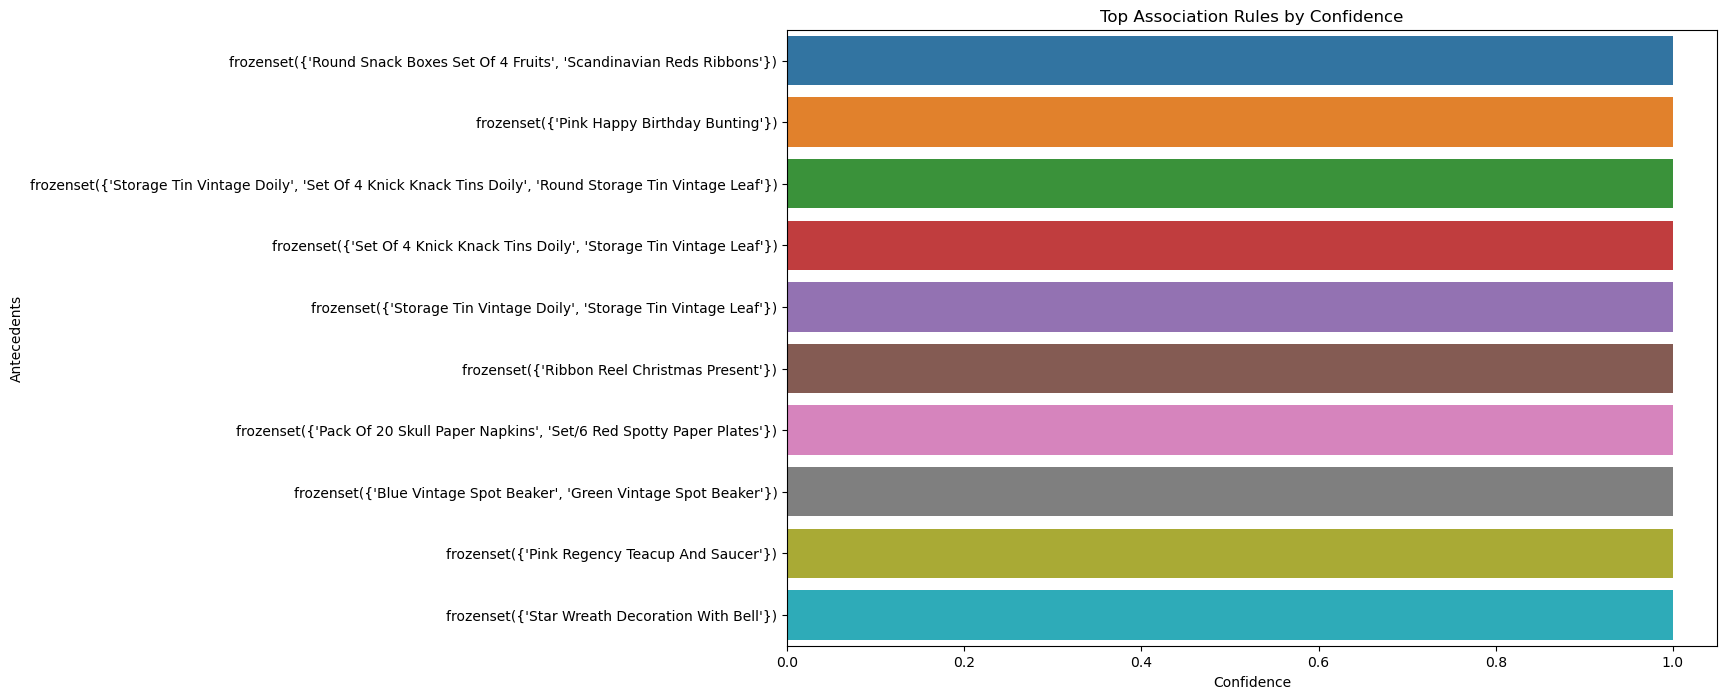

In [16]:
top_rules = rules.sort_values('confidence', ascending=False).head(10)
rules = rules.sort_values('confidence', ascending=True)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_rules, x='confidence', y='antecedents', orient='h')
plt.title('Top Association Rules by Confidence')
plt.xlabel('Confidence')
plt.ylabel('Antecedents')
plt.show()

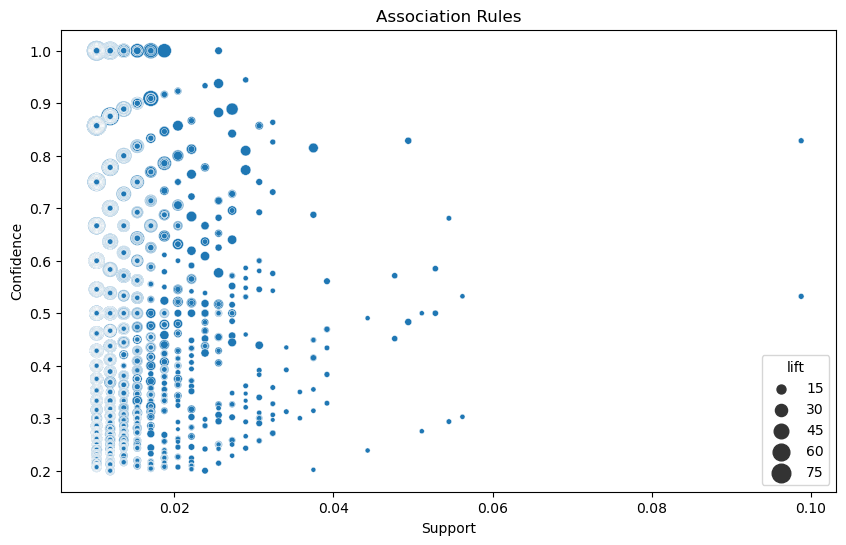

In [13]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', sizes=(10, 200), data=rules)
plt.title('Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

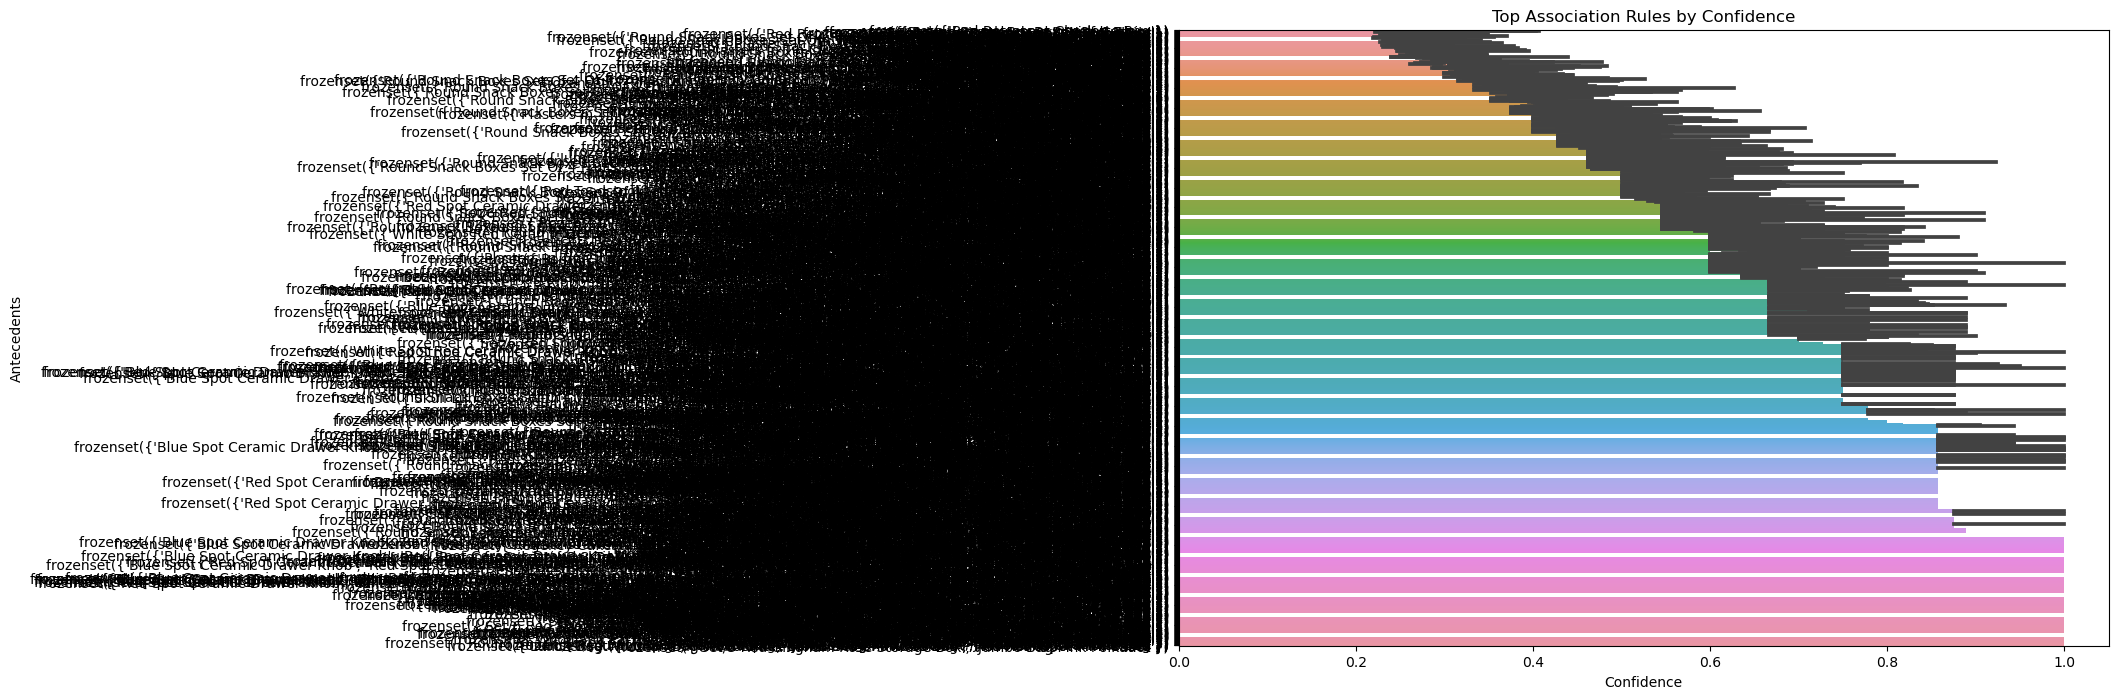

In [15]:
top_rules = rules.sort_values('confidence', ascending=False).head(10)
rules = rules.sort_values('confidence', ascending=True)
plt.figure(figsize=(12, 8))
sns.barplot(data=rules, x='confidence', y='antecedents', orient='h')
plt.title('Top Association Rules by Confidence')
plt.xlabel('Confidence')
plt.ylabel('Antecedents')
plt.show()

## Convert 'Date' column to datetime data type

In [14]:
germany_data['Date'] = pd.to_datetime(germany_data['Date'])

### Specify a Reference Date for Recency (last day of available data)

In [15]:
snapshot_date = germany_data['Date'].max() + dt.timedelta(days=1)

### Counting Recency

In [16]:
recency_df = germany_data.groupby('CustomerNo').agg({
    'Date': lambda x: (snapshot_date - x.max()).days
}).reset_index()

recency_df.rename(columns={'Date': 'Recency'}, inplace=True)

recency_df.head()


,CustomerNo,Recency
0,12426.0,195
1,12427.0,12
2,12468.0,144
3,12471.0,3
4,12472.0,31


### Counting Frequency

In [17]:

frequency_df = germany_data.groupby('CustomerNo').agg({
    'TransactionNo': 'count'
}).reset_index()

frequency_df.rename(columns={'TransactionNo': 'Frequency'}, inplace=True)

frequency_df.head()


,CustomerNo,Frequency
0,12426.0,29
1,12427.0,32
2,12468.0,371
3,12471.0,509
4,12472.0,384


### Counting Monetary

In [18]:
germany_data['TotalPrice'] = germany_data['Price'] * germany_data['Quantity']
monetary_df = germany_data.groupby('CustomerNo').agg({
    'TotalPrice': 'sum'
}).reset_index()

monetary_df.rename(columns={'TotalPrice': 'Monetary'}, inplace=True)

monetary_df.head()


,CustomerNo,Monetary
0,12426.0,3126.61
1,12427.0,4176.45
2,12468.0,15984.73
3,12471.0,87408.68
4,12472.0,46128.88


###  Merge Data

In [19]:
rfm = recency_df.merge(frequency_df, on='CustomerNo').merge(monetary_df, on='CustomerNo')
rfm.head()

,CustomerNo,Recency,Frequency,Monetary
0,12426.0,195,29,3126.61
1,12427.0,12,32,4176.45
2,12468.0,144,371,15984.73
3,12471.0,3,509,87408.68
4,12472.0,31,384,46128.88


###  rank data and normalise data

In [20]:
rfm['R_rank'] = rfm['Recency'].rank(ascending=False) # low is good
rfm['F_rank'] = rfm['Frequency'].rank(ascending=True) # high is good
rfm['M_rank'] = rfm['Monetary'].rank(ascending=True) # high is good


rfm['R_rank_norm'] = (rfm['R_rank']/rfm['R_rank'].max())*100
rfm['F_rank_norm'] = (rfm['F_rank']/rfm['F_rank'].max())*100
rfm['M_rank_norm'] = (rfm['M_rank']/rfm['M_rank'].max())*100

rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
rfm

,CustomerNo,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,12426.0,195,29,3126.61,13.259669,29.347826,30.434783
1,12427.0,12,32,4176.45,79.558011,33.152174,40.217391
2,12468.0,144,371,15984.73,18.784530,94.565217,70.652174
3,12471.0,3,509,87408.68,93.922652,98.913043,100.000000
4,12472.0,31,384,46128.88,50.828729,95.652174,91.304348
...,...,...,...,...,...,...,...
87,13814.0,57,58,10435.52,40.883978,48.913043,57.608696
88,13815.0,23,174,27348.55,65.193370,79.347826,83.695652
89,13816.0,24,31,3118.90,60.773481,30.978261,29.347826
90,13817.0,30,22,2345.98,52.486188,26.086957,19.565217


In [21]:
# Menghitung skor RFM gabungan
rfm['RFM_Score'] = 0.15 * rfm['R_rank_norm'] + 0.28 * rfm['F_rank_norm'] + 0.57 * rfm['M_rank_norm']
rfm['RFM_Score'] *= 0.05 # change it from 0-100 to score 0-5
rfm = rfm.round(2)
rfm[['CustomerNo', 'RFM_Score']]
rfm.head()


,CustomerNo,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,12426.0,195,29,3126.61,13.26,29.35,30.43,1.38
1,12427.0,12,32,4176.45,79.56,33.15,40.22,2.21
2,12468.0,144,371,15984.73,18.78,94.57,70.65,3.48
3,12471.0,3,509,87408.68,93.92,98.91,100.00,4.94
4,12472.0,31,384,46128.88,50.83,95.65,91.30,4.32


# Create RFM Segmentation

In [22]:
# Define the function for RFM segmentation
def rfm_segment(df):
    if df['RFM_Score'] >= 2.5:
        return 'Best Customers'
    elif df['RFM_Score'] >= 1.5:
        return 'Loyal Customers'
    elif df['RFM_Score'] >= 1:
        return 'Potential Loyalists'
    else:
        return 'regular customers'

# Add segmentation column to RFM table
rfm['Customer_Segment'] = rfm.apply(rfm_segment, axis=1)

# Display the distribution of customer segments
rfm['Customer_Segment'].value_counts()


Best Customers         47
Loyal Customers        19
regular customers      16
Potential Loyalists    10
Name: Customer_Segment, dtype: int64

### visualisation

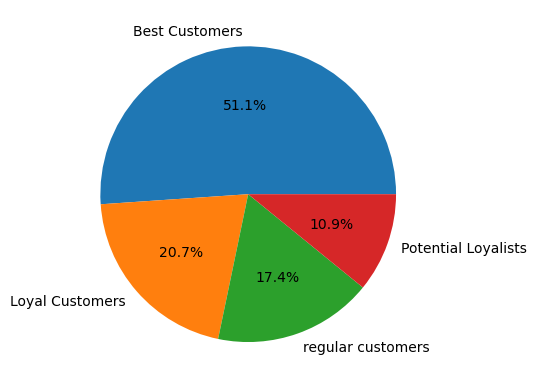

In [23]:
plt.pie(rfm['Customer_Segment'].value_counts(),
        labels=rfm['Customer_Segment'].value_counts().index,
       autopct='%.1f%%')
plt.show()